# Attempting to take the Data Innovation Challenge

Import necessary libraries

In [1]:
import pandas as pd
import os,json
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from matplotlib.pyplot import xticks

Import the jason files into the dataframe

In [9]:
path_to_json = 'C:\DS\Python-Data-Science-and-Machine-Learning-Bootcamp\Innovation Challenge\DS\innovation'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


Declare an empty dataframe with needed columns

In [35]:
#   json_data = pd.DataFrame(columns=['bwithbug','caseid', 'casestate','csone','date','defectcount','fduration','indexendtime','priority','problemcode','resolutioncode','subtech','table','technology'])

# json_data = pd.DataFrame(columns=['bwithbug','caseid', 'casestate'])

json_data = pd.DataFrame(columns=['bwithbug','caseid','casestate','date','technology','text'])



Code to load **json files into the dataframe**

In [53]:
for index, js in enumerate(json_files):
    file_path = os.path.join(path_to_json, js)
    with open(file_path, encoding="utf8") as json_file:
        json_text = json.load(json_file)
        caseid = json_text[0]['caseid']
        bwithbug = json_text[0]['bwithbug']
        casestate = json_text[0]['casestate']
        date = json_text[0]['date']
#         problem_code = json_text[0]['problem_code']
        technology = json_text[0]['technology']
#         resolutionsummary = json_text[0]['resolutionsummary']
        text = json_text[0]['text']
       

        # here you need to know the layout of your json and each json has to have
        # the same structure (obviously not the structure I have here)
        
#         casestate = json_text[0]['casestate']
#         bwithbug = json_text[0]['bwithbug']
#         csone = json_text[0]['csone']
#         date = json_text[0]['date']
#         defectcount = json_text[0]['defectcount']
#         fduration = json_text[0]['fduration']
# #         icomplexity = json_text[0]['icomplexity']
#         indexendtime = json_text[0]['indexendtime']
# #         linkeddefects = json_text[0]['linkeddefects']
#         priority = json_text[0]['priority']
#         problemcode = json_text[0]['problemcode']
# #         resolutioncode = json_text[0]['resolutioncode']
# #         srserialnum = json_text[0]['srserialnum']
#         subtech = json_text[0]['subtech']
# #         swproducttype = json_text[0]['swproducttype']
# #        swversion = json_text[0]['swversion']
#         table = json_text[0]['table']
#         technology = json_text[0]['technology']
        
#         json_data.loc[index] = [bwithbug,caseid,casestate,csone,date,defectcount,fduration,indexendtime,priority,problemcode,resolutioncode,subtech,table,technology]
            
        json_data.loc[index] = [bwithbug,caseid,casestate,date,technology,text]


In [54]:
json_data.head()

,bwithbug,caseid,casestate,date,technology,text
0,[true],[683748427],[Closed],[Tue Jan 09 16:00:00 PST 2018],[Security - Management],[FMC4500-K9 // Issues with inline devices show...
1,[true],[683791530],[Closed],[Tue Jan 16 16:00:00 PST 2018],[Security - Network Firewalls and Intrusion Pr...,[FMCv {6.2.3.3} // User Identity is not workin...
2,[false],[683964796],[Closed w/o Customer Confirm],[Mon Feb 12 16:00:00 PST 2018],[Security - Network Firewalls and Intrusion Pr...,[FirePower AMP file/malware inspection of SMTP...
3,[true],[684012635],[Closed],[Tue Feb 20 16:00:00 PST 2018],[Security - Network Firewalls and Intrusion Pr...,[FTD-FPR/2130/6.2.3/Elephant flows detection/q...
4,[true],[684016003],[Closed],[Tue Feb 20 16:00:00 PST 2018],[Security - Network Firewalls and Intrusion Pr...,[(ESC)FMC2500/6.2.3.3/FTD5508-6.2.3.3/User map...


In [20]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 1867
Data columns (total 6 columns):
bwithbug      1868 non-null object
caseid        1868 non-null object
casestate     1868 non-null object
date          1868 non-null object
technology    1868 non-null object
text          1868 non-null object
dtypes: object(6)
memory usage: 102.2+ KB


In [55]:
def rembrace(text):
       return text[0]

In [56]:
df = json_data

In [57]:
df['bwithbug'] = df['bwithbug'].apply(rembrace)
df['caseid'] = df['caseid'].apply(rembrace)
df['casestate'] = df['casestate'].apply(rembrace)
df['date'] = df['date'].apply(rembrace)
df['technology'] = df['technology'].apply(rembrace)
df['text'] = df['text'].apply(rembrace)


In [58]:
df.head()

,bwithbug,caseid,casestate,date,technology,text
0,true,683748427,Closed,Tue Jan 09 16:00:00 PST 2018,Security - Management,FMC4500-K9 // Issues with inline devices showi...
1,true,683791530,Closed,Tue Jan 16 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FMCv {6.2.3.3} // User Identity is not working...
2,false,683964796,Closed w/o Customer Confirm,Mon Feb 12 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FirePower AMP file/malware inspection of SMTP/...
3,true,684012635,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FTD-FPR/2130/6.2.3/Elephant flows detection/qu...
4,true,684016003,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,(ESC)FMC2500/6.2.3.3/FTD5508-6.2.3.3/User mapp...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 1867
Data columns (total 6 columns):
bwithbug      1868 non-null object
caseid        1868 non-null object
casestate     1868 non-null object
date          1868 non-null object
technology    1868 non-null object
text          1868 non-null object
dtypes: object(6)
memory usage: 102.2+ KB


In [59]:
df['bwithbug'] = df['bwithbug'].apply(str)

In [60]:
df.head()

,bwithbug,caseid,casestate,date,technology,text
0,true,683748427,Closed,Tue Jan 09 16:00:00 PST 2018,Security - Management,FMC4500-K9 // Issues with inline devices showi...
1,true,683791530,Closed,Tue Jan 16 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FMCv {6.2.3.3} // User Identity is not working...
2,false,683964796,Closed w/o Customer Confirm,Mon Feb 12 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FirePower AMP file/malware inspection of SMTP/...
3,true,684012635,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FTD-FPR/2130/6.2.3/Elephant flows detection/qu...
4,true,684016003,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,(ESC)FMC2500/6.2.3.3/FTD5508-6.2.3.3/User mapp...


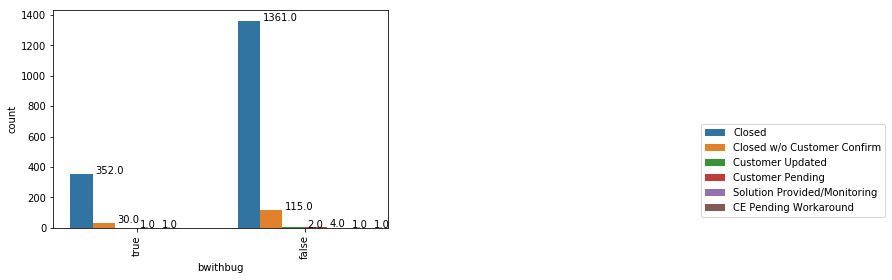

In [96]:
ax = sns.countplot(x='bwithbug',data=df,hue='casestate')
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)
ax.legend(loc=1,bbox_to_anchor=(2, 0., 0.5, 0.5))

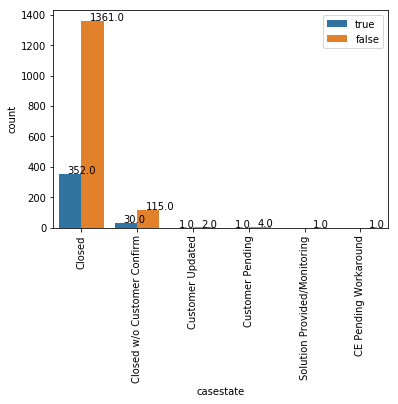

In [93]:
ax = sns.countplot(x='casestate',data=df,hue='bwithbug')
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)
ax.legend(loc=1)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

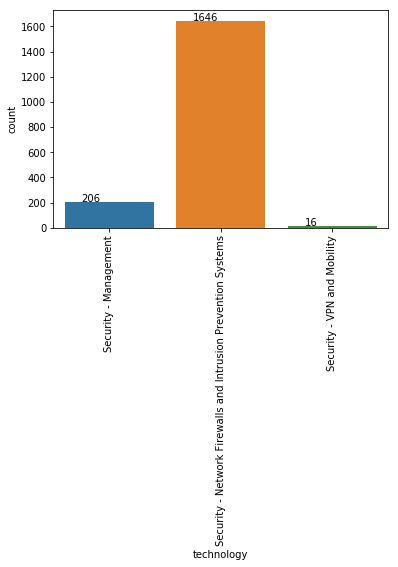

In [88]:
ax = sns.countplot(x='technology',data=df)
for p in ax.patches:
     ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+1))
xticks(rotation=90)

In [97]:
df["lentext"] = df["text"].apply(len)

In [98]:
df.head()

,bwithbug,caseid,casestate,date,technology,text,lentext
0,true,683748427,Closed,Tue Jan 09 16:00:00 PST 2018,Security - Management,FMC4500-K9 // Issues with inline devices showi...,958220
1,true,683791530,Closed,Tue Jan 16 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FMCv {6.2.3.3} // User Identity is not working...,642332
2,false,683964796,Closed w/o Customer Confirm,Mon Feb 12 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FirePower AMP file/malware inspection of SMTP/...,74361
3,true,684012635,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,FTD-FPR/2130/6.2.3/Elephant flows detection/qu...,1115134
4,true,684016003,Closed,Tue Feb 20 16:00:00 PST 2018,Security - Network Firewalls and Intrusion Pre...,(ESC)FMC2500/6.2.3.3/FTD5508-6.2.3.3/User mapp...,146320


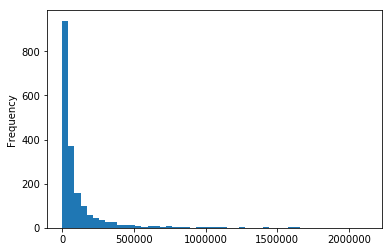

In [108]:
df['lentext'].plot(bins=50, kind='hist') 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DA9234908>,
      dtype=object)

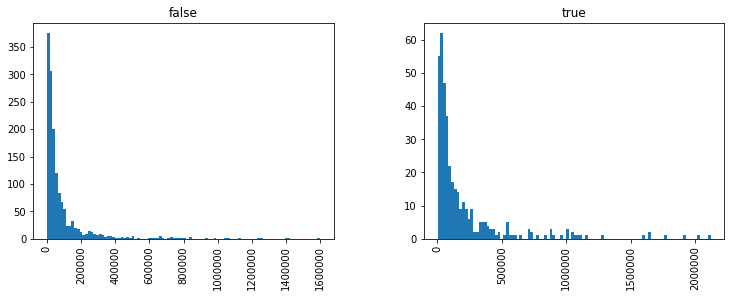

In [112]:
df.hist(column='lentext',by='bwithbug',bins=100,figsize=(12,4))

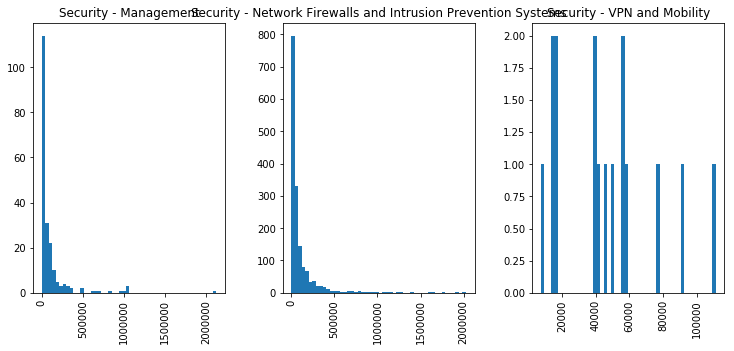

In [124]:
ax = df.hist(column='lentext',by='technology',bins=50,figsize=(12,5),layout=(1,3))

In [125]:
df.to_csv("Datav1.csv")

In [ ]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
str = "hi this is a text"
print(len(str))